<a href="https://colab.research.google.com/github/verondel/data_analysis/blob/main/hw_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1: Exploratory data analysis

In [ ]:
import os
from pandas import read_csv, set_option
import numpy as np
import plotly.express
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from scipy import stats

Ссылка на датасет: [Latest_Data_Science_Salaries](https://www.kaggle.com/datasets/iamsouravbanerjee/data-science-salaries-2023/data?select=Latest_Data_Science_Salaries.csv)

## 1

In [ ]:
os.chdir("/content/drive/MyDrive/sem5_python/data")
filename = "Latest_Data_Science_Salaries.csv"

## 2. .head()

In [ ]:
data = read_csv(filename)
data.head()

,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023


## 3. shape

In [ ]:
data.shape

(3300, 11)

**Вывод:** Всего 3300 записей и 11 столбцов.

## 4. dtypes


In [ ]:
data.dtypes

Job Title             object
Employment Type       object
Experience Level      object
Expertise Level       object
Salary                 int64
Salary Currency       object
Company Location      object
Salary in USD          int64
Employee Residence    object
Company Size          object
Year                   int64
dtype: object

**Вывод:**
* Столбцы "Job Title", "Employment Type", "Experience Level", "Expertise Level", "Salary Currency", "Company Location", "Employee Residence" и "Company Size" имеют тип данных object.
* Столбцы "Salary", "Salary in USD" и "Year" имеют тип данных int64.

## 5. info()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           3300 non-null   object
 1   Employment Type     3300 non-null   object
 2   Experience Level    3300 non-null   object
 3   Expertise Level     3300 non-null   object
 4   Salary              3300 non-null   int64 
 5   Salary Currency     3300 non-null   object
 6   Company Location    3300 non-null   object
 7   Salary in USD       3300 non-null   int64 
 8   Employee Residence  3300 non-null   object
 9   Company Size        3300 non-null   object
 10  Year                3300 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 283.7+ KB


**Вывод:** Всего в наборе данных 3300 записей, 11 столбцов, используется 283.7+ KB памяти.

## 6. groupby

In [ ]:
# Группируем данные по столбцу "Experience Level" и подсчитываем количество наблюдений в каждом классе
experience_level_distribution = data.groupby('Experience Level').size()
experience_level_distribution

Experience Level
Entry         292
Executive     146
Mid           797
Senior       2065
dtype: int64

**Вывод:** Распределение данных по уровню опыта не является сбалансированным. Класс "Senior" имеет наибольшее количество, в то время как классы "Entry" и "Executive" появляются в несколько раз меньше.






In [ ]:
# company_location_distribution = data.groupby('Company Size').size()
# company_location_distribution

In [ ]:
job_title_distribution = data.groupby('Job Title').size().sort_values(ascending=False).head()
job_title_distribution

Job Title
Data Engineer                702
Data Scientist               635
Data Analyst                 459
Machine Learning Engineer    300
Analytics Engineer           132
dtype: int64

## 7. set_option('precision', 3)

In [ ]:
set_option('display.precision', 3) # точность вывода

## 8. describe()

In [ ]:
data.describe()

,Salary,Salary in USD,Year
count,3.300e+03,3300.000,3300.000
mean,2.047e+05,142095.984,2022.495
std,7.279e+05,69028.236,0.716
min,1.400e+04,15000.000,2020.000
25%,9.417e+04,90000.000,2022.000
50%,1.400e+05,136000.000,2023.000
75%,1.900e+05,185000.000,2023.000
max,3.040e+07,450000.000,2023.000


**Вывод:** \
Величина "Salary in USD" (заработная плата людей, работающих в области Data Science в год в долларах США):
* Средняя зарплата составляет около 142,095 долларов.
* Стандартное отклонение зарплаты высокое (примерно 69,028.24).
* Минимальная зарплата составляет 15,000 долларов, а максимальная - 450,000 долларов.
* Медианное значение составляет 136,000 долларов, что меньше средней зарплаты, что также может указывать на наличие правого хвоста в распределении.
* 25% зарплат ниже 90000.
* 50% зарплат ниже 136000.
* 75% запрлат 185000.



In [ ]:
# categorical_summary = data.describe(include=['O'])
# categorical_summary

,Job Title,Employment Type,Experience Level,Expertise Level,Salary Currency,Company Location,Employee Residence,Company Size
count,3300,3300,3300,3300,3300,3300,3300,3300
unique,111,4,4,4,22,71,83,3
top,Data Engineer,Full-Time,Senior,Expert,United States Dollar,United States,United States,Medium
freq,702,3261,2065,2065,2770,2495,2453,2707


## 9. skew()

In [ ]:
data.skew()

<ipython-input-16-b3b431164adb>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


Salary           26.010
Salary in USD     0.648
Year             -1.420
dtype: float64

In [ ]:
n = len(data) # n = data.shape[0] # объем выборки
skew_err = pow(((6*(n-1))/((n+1)*(n+3))), 1/3)
skew_err

0.12199063425519305

**Вывод:**\
**Salary (Зарплата):**\
 Коэффициент асимметрии равный 26.01 указывает на значительную асимметрию. Распределение данных по зарплатам сильно смещено вправо и имеет длинный правый хвост.

**Salary in USD**: Коэффициент асимметрии равный 0.648 говорит о том, что распределение данных по зарплатам в долларах ближе к симметричному распределению, но находится за пределами стандартной ошибки, поэтому имеет некоторую асимметрию.

**Year**: Коэффициент асимметрии равный -1.42 указывает на небольшую асимметрию в распределении года. Он отрицателен, что означает, что данные более смещены влево. Вероятно, в данных преобладают более ранние годы.


## 10. kurtosis()

In [ ]:
data.kurtosis()

<ipython-input-17-9ff11a21a968>:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.kurtosis()


Salary           945.479
Salary in USD      0.567
Year               1.722
dtype: float64

In [ ]:
n = len(data) # объем выборки
kurtosis_err = 5 * pow(((24*n*(n-2)*(n-3))/(pow((n+1),2)*(n+3)*(n+5))), 1/2)
kurtosis_err

0.42543366321494314

**Вывод:**
\
"Salary in USD": Значение эксцесса равное 0.567 превышает стандартную ошибку эксцесса (0.42543). Распределение близко к нормальному распределению, но все равно может содержать некоторые выбросы или отклонения.

## 11. corr(method='pearson').

In [ ]:
data.corr(method='pearson')

<ipython-input-18-c50c7eb58c83>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(method='pearson')


,Salary,Salary in USD,Year
Salary,1.000,-0.026,-0.099
Salary in USD,-0.026,1.000,0.232
Year,-0.099,0.232,1.000


**Вывод:** \
Между "Salary in USD" и "Year" коэффициент корреляции составляет 0.232. Связь между этими двумя признаками слабая, но положительная. Это может говорить о том, что чем больше прошло времени (год), тем, скорее всего, будет немного выше зарплата в долларах США, но изменение не будет значительным (с течением времени зарплаты, выраженные в долларах США, немного растут).

## 12. hist(figsize=(8,8))


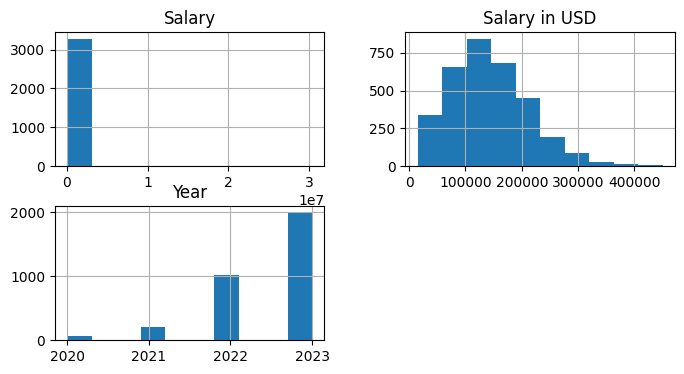

In [ ]:
data.hist(figsize=(8,4))
plt.show()

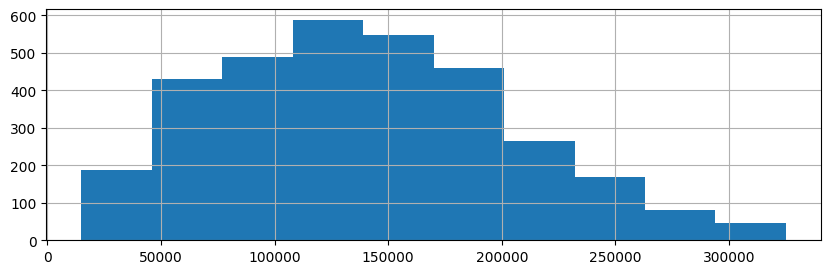

In [ ]:
# Предположим, что ваш датасет находится в переменной data, а вы хотите обрезать столбец "Salary in USD"
column_name = "Salary in USD"

# 25-й и 75-й перцентили
Q1 = data[column_name].quantile(0.25)
#print(Q1)
Q3 = data[column_name].quantile(0.75)

# интерквартильный диапазон (IQR)
IQR = Q3 - Q1
#print("Разница между верхним (75-й перцентиль) и нижним (25-й перцентиль) составляет ", IQR)

# нижний и верхний пороги для обрезки данных
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# фильтр (значения, находящиеся внутри интервала)
trimmed_data = data[(data[column_name] >= lower_threshold) & (data[column_name] <= upper_threshold)]

trimmed_data[column_name].hist(figsize=(10,3))
plt.show()

**Вывод:** \
На гистограмме видно, что распределение данных признака имеет легкую асимметрию. \
В данном случае, мода признака находится слева от центра гистограммы.


## 13. Функция плотности для всех признаков


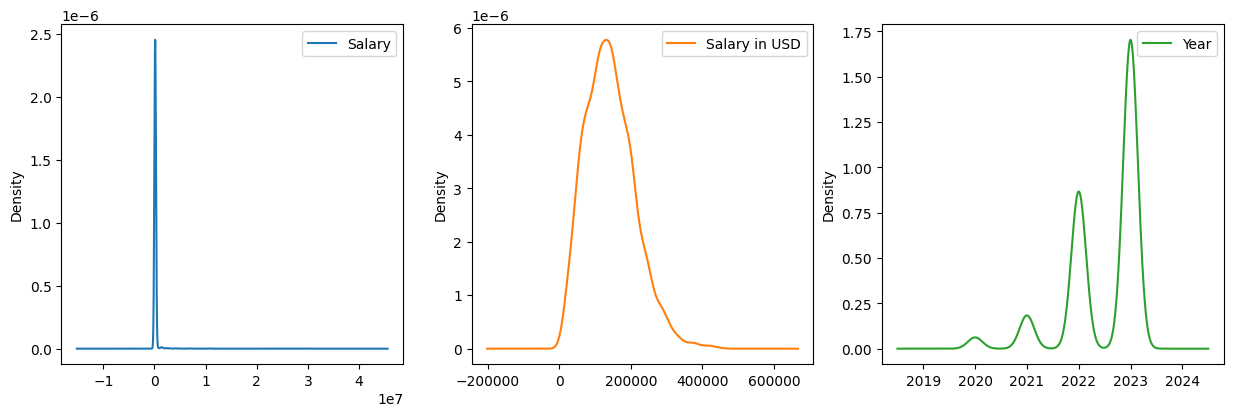

In [ ]:
data.plot(kind='kde',
          subplots=True, # несколько рисунков
          layout=(3,3),
          sharex=False, # отдельное описание x
          sharey=False,
          figsize=(15,15)
          )
plt.show()

**Вывод:** \
Плотность распределение "Salary in USD" имеет положительное значение ассиметрии

## 14. Ящики с усами

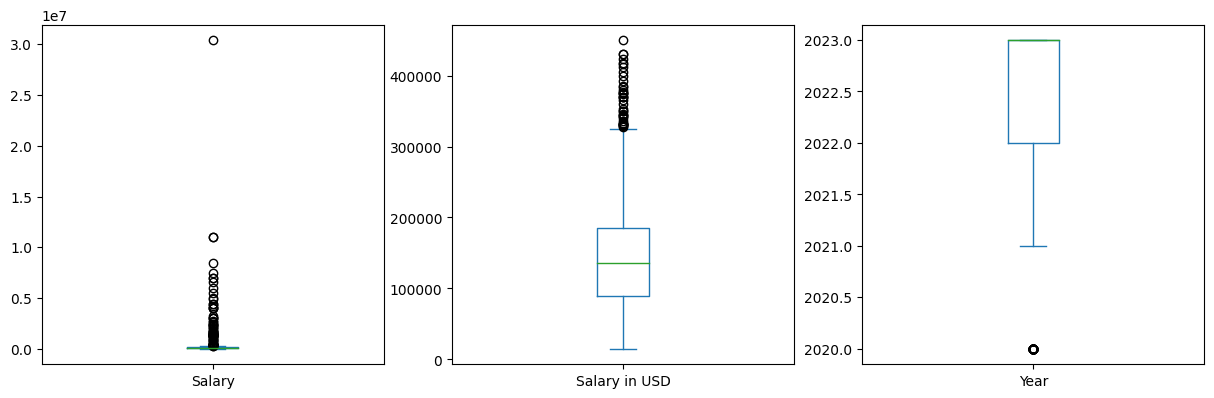

In [ ]:
data.plot(kind='box', subplots=True,
          layout=(3,3), sharex=False, sharey=False,
          figsize=(15,15))
plt.show()

In [ ]:
x = 'Salary in USD'
fig = plotly.express.box(data, x)
fig.update_layout(title=f'<b>Boxplot<br> <sup>{x}</sup></b>',
    showlegend=False,
    yaxis=dict(tickangle= -45),
    height=300,
    width=1500,
    margin=dict(t=100, l=80),
    template='plotly_white')


**Вывод**:
  
Медианная зарплата (горизонтальная линия в середине ящика) находится на уровне 136,000 долларов США. Верхний квартиль (Q3) составляет 185,000 долларов США, а нижний квартиль (Q1) находится около 90,000 долларов США. На графике есть несколько выбросов, то есть значений, которые значительно отличаются от основной массы данных. \
Усы (вертикальные линии, выходящие из ящика) от 15,000 долларов США до больше 400,000.


In [ ]:
x = 'Salary in USD'
y = 'Experience Level'
fig = plotly.express.box(data, x, y)

fig.update_layout(title=f'<b>Boxplot<br> <sup> {y} by {x}</sup></b>',
    showlegend=False,
    yaxis=dict(tickangle= -45),
    height=600,
    width=1000,
    margin=dict(t=100, l=80),
    template='plotly_white')

fig.show()

## 15. Коррелограмма в виде тепловой карты

<ipython-input-86-35bf3a1296af>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


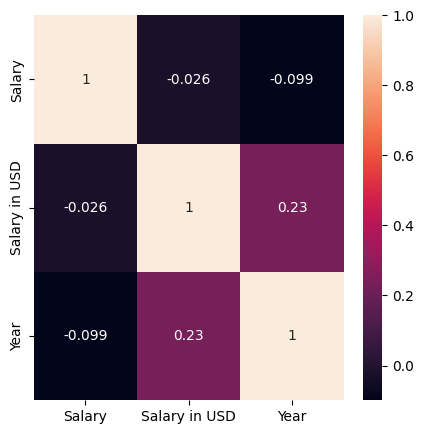

In [ ]:
fig = plt.figure(figsize=(5,5))
sns.heatmap(data.corr(), annot = True)
plt.show()

**Вывод:** \
* Незначительная пложительная корреляция между зарплатой и годом (с течением времени зарплаты увеличиваются)





## 16. Диаграмма рассеяния

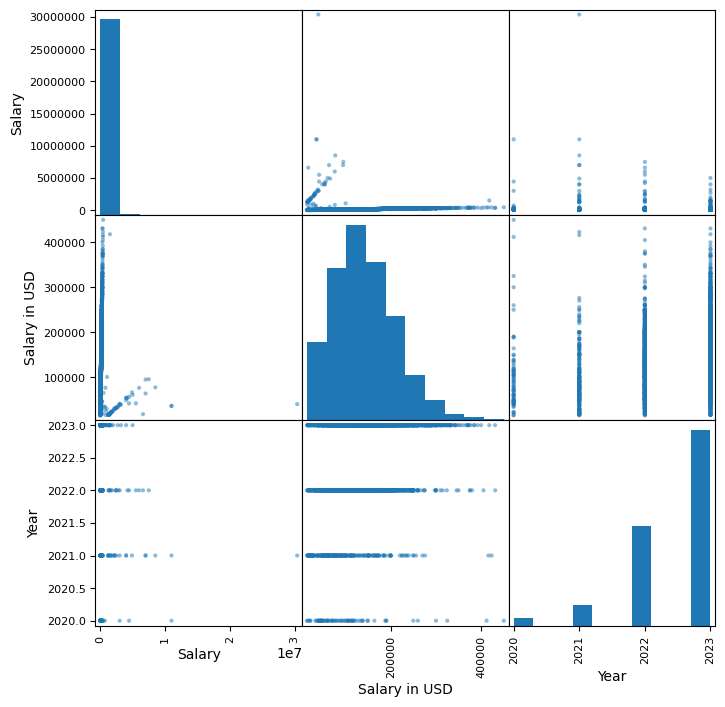

In [ ]:
scatter_matrix(data, figsize=(8,8))
plt.show()